In [1]:
# import libraries
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend

In [2]:
#Load the data
# from google.colab import files
# uploaded=files.upload()

df=pd.read_csv('kidney_disease.csv')

#print first 5 rows
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
#get the shape of data(the number of rows  & columns)
df.shape

(400, 26)

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'bp'}>],
       [<Axes: title={'center': 'sg'}>, <Axes: title={'center': 'al'}>,
        <Axes: title={'center': 'su'}>],
       [<Axes: title={'center': 'bgr'}>, <Axes: title={'center': 'bu'}>,
        <Axes: title={'center': 'sc'}>],
       [<Axes: title={'center': 'sod'}>, <Axes: title={'center': 'pot'}>,
        <Axes: title={'center': 'hemo'}>]], dtype=object)

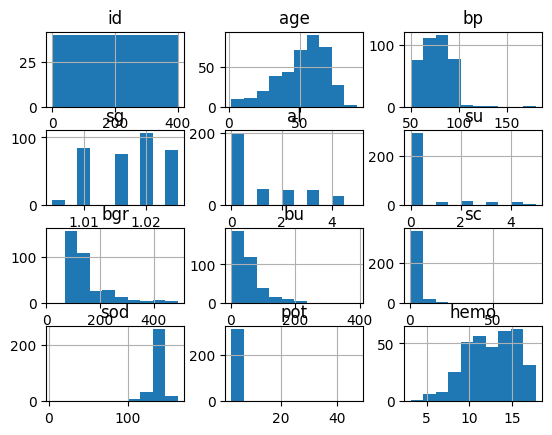

In [4]:
df.hist()

In [5]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [6]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [7]:
#create list of columns names to keep
column_to_retain = ['sg', 'al', 'sc', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'classification']

#drop columns that are not in columns_to_retain
df=df.drop([col for col in df.columns if not col in col in column_to_retain], axis=1)

#drop rows with na or missing values
df=df.dropna(axis=0)

In [8]:
#Transform the non-numeric data in columns
for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column] = LabelEncoder().fit_transform( df[column] )

In [9]:
#Print first 5 rows of the new cleaned dataset
df.head()

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,28,1,0
1,1.020,4.0,0.8,11.3,22,0,0
2,1.010,2.0,1.8,9.6,15,0,0
3,1.005,4.0,3.8,11.2,16,1,0
4,1.010,2.0,1.4,11.6,19,0,0


In [10]:
#Split data into independent (X) data set (the features) and dependent (y) dataset (the target)
X= df.drop(['classification'], axis=1)
y= df['classification']

In [11]:
#feature scaling
#min-max scaler method scales the dataset so that all input features lie between 0 and 1
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names]= x_scaler.transform(X)

In [12]:
#Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

In [13]:
#Build the model
model = Sequential()
model.add( Dense(256, input_dim=len(X.columns), kernel_initializer= k.initializers.random_normal(seed=13), activation='relu'))
model.add(Dense(1, activation='hard_sigmoid'))

In [14]:
#Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
#Train model
history = model.fit(X_train, y_train, epochs = 200, batch_size= X_train.shape[0])

Epoch 1/200


1/1 [==============================] - 1s 924ms/step - loss: 0.6976 - accuracy: 0.2533
Epoch 2/200
1/1 [==============================] - 0s 10ms/step - loss: 0.6902 - accuracy: 0.6987
Epoch 3/200
1/1 [==============================] - 0s 10ms/step - loss: 0.6829 - accuracy: 0.8079
Epoch 4/200
1/1 [==============================] - 0s 10ms/step - loss: 0.6758 - accuracy: 0.8166
Epoch 5/200
1/1 [==============================] - 0s 10ms/step - loss: 0.6687 - accuracy: 0.8210
Epoch 6/200
1/1 [==============================] - 0s 9ms/step - loss: 0.6617 - accuracy: 0.8210
Epoch 7/200
1/1 [==============================] - 0s 8ms/step - loss: 0.6548 - accuracy: 0.8253
Epoch 8/200
1/1 [==============================] - 0s 9ms/step - loss: 0.6479 - accuracy: 0.8253
Epoch 9/200
1/1 [==============================] - 0s 9ms/step - loss: 0.6411 - accuracy: 0.8384
Epoch 10/200
1/1 [==============================] - 0s 8ms/step - loss: 0.6343 - accuracy: 0.8428
Epoch 11/200
1/1 [=================

In [16]:
#save the model
model.save('webapp/model/kd.h5')

Text(0.5, 0, 'epoch')

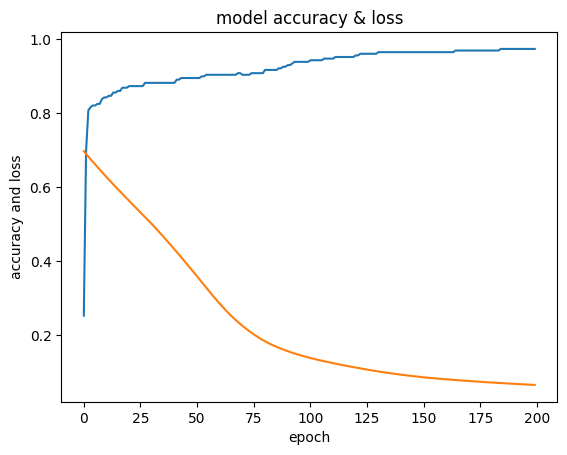

In [17]:
#visualize the models loss and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy & loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')

In [18]:
# Get shape of the trainig and testing data set
print('shape of training data :', X_train.shape)
print('shape of test data :', X_test.shape)

shape of training data : (229, 6)
shape of test data : (58, 6)


In [19]:
pred=model.predict(X_test)
pred=[1 if y>=0.5 else 0 for y in pred]

print('Original : {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted : {0}'.format(", ".join(str(x) for x in pred)))

2/2 [==============================] - 0s 4ms/step
Original : 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0
Predicted : 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0
